#### Newton Polynomial 2D

In [1]:
import time
import numpy as np
import minterpy as mp
import matplotlib.pyplot as plt

In [2]:
# SECTION : SUBSECTION
    # (markdown introduction)
    # METHODS : DESCRIPTION
    # PARAMETERS : DESCRIPTION
    # COMPUTATIONS : DESCRIPTION
    # OUTPUTS : DESCRIPTION

#### NP (2D) : Interpolation

In [3]:
# METHODS

def runge_function(x):
    
    return 1 / (1 + 25 * (x[:,0]**2 + x[:,1]**2))

In [4]:
# PARAMETERS

points_x = points_y = 150

spatial_dimension = 2

poly_degree_max = 200
poly_degree_euc = 210
poly_degree_abs = 220
poly_degree_sin = 230

x, y = np.linspace(-1, 1, points_x), np.linspace(-1, 1, points_y)
grid = np.flip(mp.utils.cartesian_product(y, x), axis=1)

In [5]:
# COMPUTATIONS : Interpolants

start1 = time.time()

interpolant_max = mp.interpolate(
    runge_function,
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree_max,
    lp_degree = np.infty)

end1= time.time()

start2 = time.time()

interpolant_euc = mp.interpolate(
    runge_function,
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree_euc,
    lp_degree = 2.0)

end2 = time.time()

start3 = time.time()

interpolant_abs = mp.interpolate(
    runge_function,
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree_abs,
    lp_degree = 1.0)

end3 = time.time()

start4 = time.time()

interpolant_sin = mp.interpolate(
    runge_function,
    spatial_dimension = spatial_dimension,
    poly_degree = poly_degree_sin,
    lp_degree = 10e-10)

end4 = time.time()

In [6]:
# COMPUTATIONS : Runtime

runtime_i = np.array([end1 - start1, end2 - start2, end3 - start3, end4 - start4])
runtime_i = np.round(runtime_i * 10e5) / 10e2
runtime_i = [ f"{it_r} ms" for it_r in runtime_i]

In [7]:
# OUTPUTS : Runtime

print(f"Interpolation time = {runtime_i}")

Interpolation time = ['126711.845 ms', '90811.51 ms', '52864.451 ms', '7017.184 ms']


#### NP (2D) : Evaluation

In [8]:
# COMPUTATIONS : runge function

gt = runge_function(grid).reshape(points_x, points_y) # ground truth

In [9]:
# COMPUTATIONS : Evaluation of maximal degree polynomial

start1 = time.time()
Z_max = interpolant_max(grid).reshape(points_x, points_y) # evaluate interpolant
end1 = time.time()

rel_eps_max = np.abs(((Z_max - gt) / gt).reshape(-1)) # relative pointwise error

msre_max = np.mean(rel_eps_max**2) # relative mean squared error
msre_max = "{:.2e}".format(msre_max) # scientific notation

mre_max = np.max(rel_eps_max) # relative max abs error
mre_max = "{:.2e}".format(mre_max) # scientific notation

aoc_max = (poly_degree_max + 1)**2 # amount of coefficients in use for the interpolant_max

In [10]:
# COMPUTATIONS : Evaluation of euclidean degree polynomial

start2 = time.time()
Z_euc = interpolant_euc(grid).reshape(points_x, points_y) # evaluate interpolant
end2 = time.time()

rel_eps_euc = np.abs(((Z_euc-gt)/gt).reshape(-1)) # relative pointwise error

msre_euc = np.mean(rel_eps_euc**2) # relative mean squared error
msre_euc = "{:.2e}".format(msre_euc) # scientific notation

mre_euc = np.max(rel_eps_euc) # relative max abs error
mre_euc = "{:.2e}".format(mre_euc) # scientific notation

aoc_euc = len(mp.MultiIndexSet.from_degree(
    spatial_dimension, poly_degree_euc, 2.0)) # amount of coefficients in use for the interpolant_euc

In [11]:
# COMPUTATIONS : Evaluation of absolute degree polynomial

start3 = time.time()
Z_abs = interpolant_abs(grid).reshape(points_x, points_y) # evaluate interpolant
end3 = time.time()

rel_eps_abs = np.abs(((Z_abs - gt) / gt).reshape(-1))# relative pointwise error

msre_abs = np.mean(rel_eps_abs**2) # relative mean squared error
msre_abs = "{:.2e}".format(msre_abs) # scientific notation

mre_abs = np.max(rel_eps_abs) # relative max abs error
mre_abs = "{:.2e}".format(mre_abs) # scientific notation

aoc_abs = len(mp.MultiIndexSet.from_degree(
    spatial_dimension, poly_degree_euc, 1.0)) # amount of coefficients in use for the interpolant_abs

In [12]:
# COMPUTATIONS : Evaluation of singular degree polynomial

start4 = time.time()
Z_sin = interpolant_sin(grid).reshape(points_x, points_y) # evaluate interpolant
end4 = time.time()

rel_eps_sin = np.abs(((Z_sin - gt) / gt).reshape(-1)) # relative pointwise error

msre_sin = np.mean(rel_eps_sin**2) # relative mean squared error
msre_sin= "{:.2e}".format(msre_sin) # scientific notation

mre_sin = np.max(rel_eps_sin) # relative max abs error
mre_sin = "{:.2e}".format(mre_sin) # scientific notation

aoc_sin = len(mp.MultiIndexSet.from_degree(
    spatial_dimension, poly_degree_euc, 10e-10)) # amount of coefficients in use for the interpolant_sin 

In [13]:
# COMPUTATIONS : Runtime

runtime_e = np.array([end1 - start1, end2 - start2, end3 - start3, end4 - start4])
runtime_e = np.round(runtime_e * 10e5) / 10e2
runtime_e = [ f"{it_r} ms" for it_r in runtime_e]

In [14]:
# OUTPUTS : Runtime

print(f"Evaluation time = {runtime_e}")

Evaluation time = ['10572.779 ms', '12191.533 ms', '8193.638 ms', '193.931 ms']


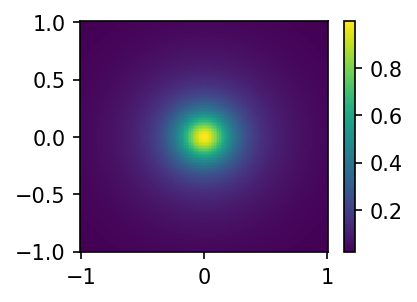

In [15]:
# OUTPUTS : Original runge function (ground truth)

fig, ax = plt.subplots(1, 1, figsize=(8/3, 2), dpi=150)

im = ax.pcolormesh(x, y, gt)
fig.colorbar(im, ax=ax)
ax.set_title('');

C:\Users\philh\AppData\Local\Temp\ipykernel_13384\2778962160.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


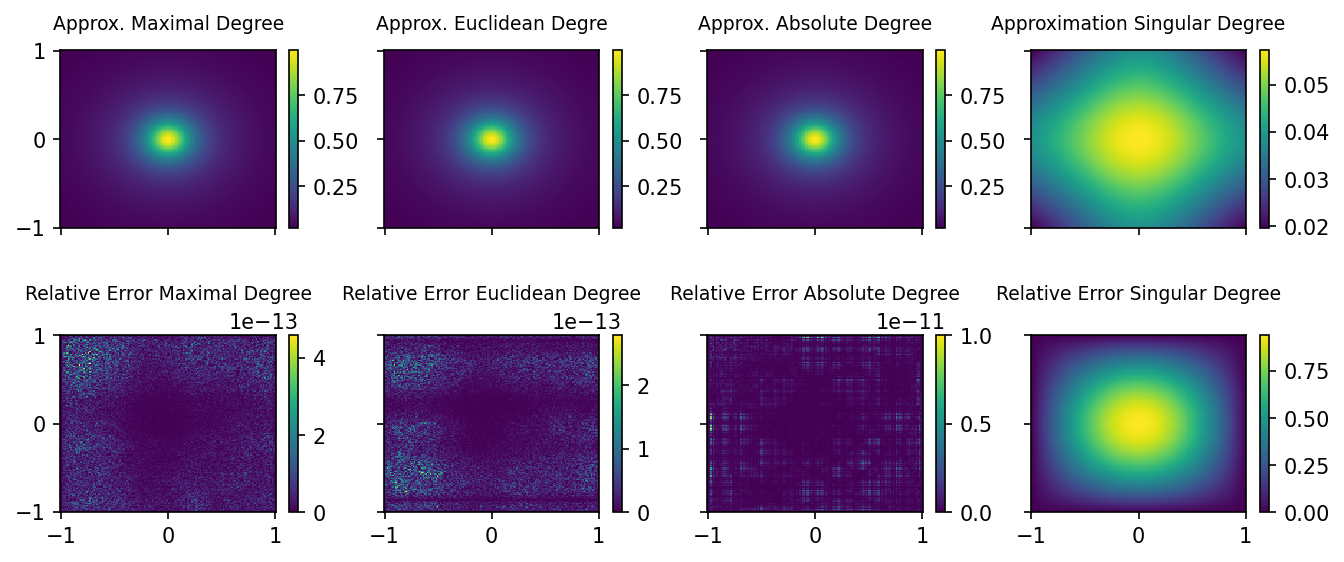

In [16]:
# OUTPUTS : Approximations and pointwise relative errors

fig, axs = plt.subplots(2, 4, figsize=(8 + 8/3, 4), sharex=True, sharey=True, gridspec_kw={'hspace': 0.6}, dpi=150)

im = axs[0][0].pcolormesh(x, y, Z_max)
fig.colorbar(im, ax=axs[0][0])
axs[0][0].set_title('Approx. Maximal Degree', fontsize = 9, pad=10)

im = axs[1][0].pcolormesh(x, y, np.abs((Z_max - gt) / gt))
fig.colorbar(im, ax=axs[1][0])
axs[1][0].set_title('Relative Error Maximal Degree', fontsize = 9, pad=17)

im = axs[0][1].pcolormesh(x, y, Z_euc)
fig.colorbar(im, ax=axs[0][1])
axs[0][1].set_title('Approx. Euclidean Degre', fontsize = 9, pad=10)

im = axs[1][1].pcolormesh(x, y, np.abs((Z_euc - gt) / gt))
fig.colorbar(im, ax=axs[1][1])
axs[1][1].set_title('Relative Error Euclidean Degree', fontsize = 9, pad=17)

im = axs[0][2].pcolormesh(x, y, Z_abs)
fig.colorbar(im, ax=axs[0][2])
axs[0][2].set_title('Approx. Absolute Degree', fontsize = 9, pad=10)

im = axs[1][2].pcolormesh(x, y, np.abs((Z_abs - gt) / gt))
fig.colorbar(im, ax=axs[1][2])
axs[1][2].set_title('Relative Error Absolute Degree', fontsize = 9, pad=17)

im = axs[0][3].pcolormesh(x, y, Z_sin)
fig.colorbar(im, ax=axs[0][3])
axs[0][3].set_title('Approximation Singular Degree', fontsize = 9, pad=10)

im = axs[1][3].pcolormesh(x, y, np.abs((Z_sin - gt) / gt))
fig.colorbar(im, ax=axs[1][3])
axs[1][3].set_title('Relative Error Singular Degree', fontsize = 9, pad=17)

plt.tight_layout()

In [17]:
print('Mean Squared Relative Error:')
print('-------------------')
print(f'maximal degree   : {msre_max}')
print(f'euclidean degree : {msre_euc}')
print(f'absolute  degree : {msre_abs}')
print(f'singular  degree : {msre_sin}')
print('\n')

print('Maximal Relative Error:')
print('--------------')
print(f'maximal degree   : {mre_max}')
print(f'euclidean degree : {mre_euc}')
print(f'absolute degree  : {mre_abs}')
print(f'singular degree  : {mre_sin}')
print('\n')

print('Amount of Coefficients:')
print('--------------')
print(f'maximal degree   : {aoc_max}')
print(f'euclidean degree : {aoc_euc}')
print(f'absolute degree  : {aoc_abs}')
print(f'singular degree  : {aoc_sin}')
print('\n')

Mean Squared Relative Error:
-------------------
maximal degree   : 2.75e-27
euclidean degree : 1.05e-27
absolute  degree : 2.80e-25
singular  degree : 2.01e-01


Maximal Relative Error:
--------------
maximal degree   : 4.60e-13
euclidean degree : 2.80e-13
absolute degree  : 1.00e-11
singular degree  : 9.43e-01


Amount of Coefficients:
--------------
maximal degree   : 40401
euclidean degree : 34837
absolute degree  : 22366
singular degree  : 421


